In [1]:
%pylab inline
from tvb.simulator.lab import *

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/duke/src/tvb-root/tvb_library/tvb/datatypes/surfaces.py:60: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)


## dynamic parameters

This demo shows changing parameters during a simulation.

Here's a regular simulation first,

2025-03-28 08:16:26,831 - WARNING - tvb.basic.readers - File 'hemispheres' not found in ZIP.
2025-03-28 08:16:26,912 - WARNING - tvb.simulator.integrators - random_state supplied for non-stochastic integration


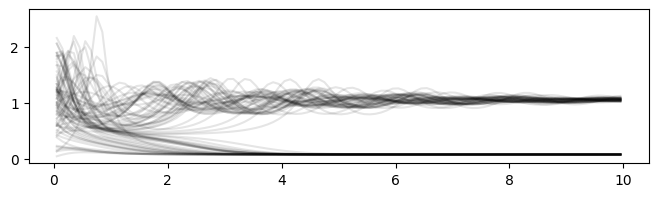

In [13]:
sim = simulator.Simulator(
    connectivity=connectivity.Connectivity.from_file(),
    integrator=integrators.HeunDeterministic(dt=0.01),
    model=models.MontbrioPazoRoxin(),
    monitors=[monitors.TemporalAverage(period=0.1)],
    simulation_length=10.0,
).configure()

(t, y), = sim.run()

figure(figsize=(8,2))
plot(t, y[:, 0, :, 0], 'k', alpha=0.1);

Next let's change the values during the simulation, every 1 ms, by setting simulation length to 1 ms, and then in a loop

- increasing eta
- continuing the simulation


2025-03-28 08:22:26,887 - WARNING - tvb.basic.readers - File 'hemispheres' not found in ZIP.
2025-03-28 08:22:26,946 - WARNING - tvb.simulator.integrators - random_state supplied for non-stochastic integration
2025-03-28 08:22:26,972 - WARNING - tvb.simulator.integrators - random_state supplied for non-stochastic integration
2025-03-28 08:22:27,000 - WARNING - tvb.simulator.integrators - random_state supplied for non-stochastic integration
2025-03-28 08:22:27,035 - WARNING - tvb.simulator.integrators - random_state supplied for non-stochastic integration
2025-03-28 08:22:27,065 - WARNING - tvb.simulator.integrators - random_state supplied for non-stochastic integration
2025-03-28 08:22:27,094 - WARNING - tvb.simulator.integrators - random_state supplied for non-stochastic integration
2025-03-28 08:22:27,124 - WARNING - tvb.simulator.integrators - random_state supplied for non-stochastic integration
2025-03-28 08:22:27,154 - WARNING - tvb.simulator.integrators - random_state supplied fo

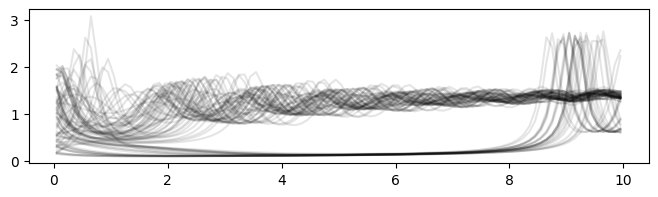

In [27]:
sim = simulator.Simulator(
    connectivity=connectivity.Connectivity.from_file(),
    integrator=integrators.HeunDeterministic(dt=0.01),
    model=models.MontbrioPazoRoxin(),
    monitors=[monitors.TemporalAverage(period=0.1)],
    simulation_length=1.0,
).configure()

t = []
y = []
for i in range(10):
    sim.model.eta = sim.model.eta + 0.3
    (t_, y_), = sim.run()
    t.append(t_)
    y.append(y_)
t, y = np.array(t).reshape(-1), np.array(y).reshape(-1, 2, 76, 1)

figure(figsize=(8,2))
plot(t, y[:, 0, :, 0], 'k', alpha=0.1);

Here we can see the increasing eta forces all nodes into upstate at the end.